C:\anaconda\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


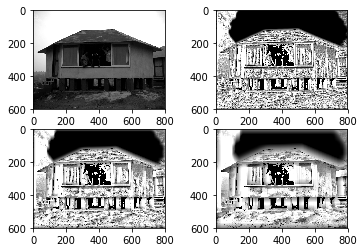

In [53]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt

def imshift(x, p, q): # p is positive row direction; q is positive column direction
    n1=x.shape[1]#columns
    n2=x.shape[0]#rows
    k=p%n2
    l=q%n1
    xshifted=np.zeros([n2,n1])
    xshifted[n2-k:n2,0:l]=x[0:k,n1-l:n1]
    xshifted[0:n2-k,l:n1]=x[k:n2,0:n1-l]
    xshifted[0:n2-k,0:l]=x[k:n2,n1-l:n1]
    xshifted[n2-k:n2,l:n1]=x[0:k,0:n1-l]
    return xshifted

def AHE_naive(img, win_size):
    n1,n2=img.shape
    s1=s2=win_size
    for i in range (s1,n1-s1):
        for j in range (s2,n2-s2):
            rank=0
            for k in range (-s1,s1+1):
                for l in range (-s2,s2+1):
                    if img[i,j]>img[i+k, j+l]:
                        rank+=1
            img[i,j]=rank*255/(s1*s2)
            
def AHE(img, win_size):
    #img=image.copy
    s1=s2=int(win_size/2)
    rank=np.zeros((img.shape[0], img.shape[1]))
    for k in range (-s1, s1+1):
        temp=np.zeros((img.shape[0], img.shape[1]))
        for l in range (-s2,s2+1):
            shift=imshift(img,-k,-l)
            temp[img>shift]=1
            rank+=temp
    out =np.zeros((img.shape[0], img.shape[1]))
    out=rank*255/(s1*s2)
    return out
            

pic=imread('beach.png')
plt.subplot(2,2,1)
plt.imshow(pic, cmap='gray')
win_size=16
pic_AHE_33=AHE(pic,win_size)
plt.subplot(2,2,2)
plt.imshow(pic_AHE_33, cmap='gray')
#imsave('beach_AHE_33.png',pic_AHE_33)
win_size=32
pic_AHE_65=AHE(pic,win_size)
plt.subplot(2,2,3)
plt.imshow(pic_AHE_65, cmap='gray')
#imsave('beach_AHE_65.png',pic_AHE_33)
win_size=64
pic_AHE_129=AHE(pic,win_size)
plt.subplot(2,2,4)
plt.imshow(pic_AHE_129, cmap='gray')
#imsave('beach_AHE_129.png',pic_AHE_129)
plt.show()